# Billionaires By Country
Dataset: From Kaggle, contains 79 rows

Goal: Learn information about billionaires in different countries and answer the following questions:

    1. How many billionaires are in each country?/Which country has the most billionaires?

    2. What is the average net worth per billionaire in their specified country?
    
    3. How much percent of the total billionaire worth do the richest billionaires make up?

## 1. Import Libraries

In [622]:
# Importing all of the libraries that I will use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the Dataset 

In [623]:
df = pd.read_csv("data/billionaires-by-country-2024.csv")

## 3. Understanding the Data

In [624]:
# Finding out basic information from the data set
df.info()
df.columns
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   population_2024                     78 non-null     object 
 1   Population_growthRate               78 non-null     float64
 2   Country_land_area                   78 non-null     float64
 3   country                             77 non-null     object 
 4   region                              77 non-null     object 
 5   unMember                            77 non-null     object 
 6   population_density_km               77 non-null     float64
 7   population_densityMi                77 non-null     float64
 8   BillionairesRichestBillionaire2023  77 non-null     object 
 9   BillionairesRichestNetWorth2023     77 non-null     float64
 10  BillionairesPerMillionPeople2023    77 non-null     float64
 11  BillionairesTotalNetWorth2023       72 non-null

(78, 12)

## 4. Cleaning/Preparing Data

#### 4.1 Dropping Columns

In [625]:
# Dropping population_density_km because I'm keeping population_density_mi
df = df[['population_2024', 'Country_land_area',
       'country', 'region', 'unMember', 'Population_growthRate',
       'population_densityMi', 'BillionairesRichestBillionaire2023',
       'BillionairesRichestNetWorth2023', 'BillionairesPerMillionPeople2023',
       'BillionairesTotalNetWorth2023']]

df.shape


(78, 11)

#### 4.2 Renaming Columns

In [626]:
# Rename columns for consistency
# The standard year will be 2023, so anything that is not in 2023 will include a year 
df = df.rename(columns={'population_2024':'Population_2024',
                   'Country_land_area':'LandArea',
                   'country':'Country',
                   'population_densityMi': 'Population_Density',
                    'Population_growthRate' : 'Population_GrowthRate',
                   'region': 'Region',
                   'unMember':'UnMember',
                   'BillionairesRichestBillionaire2023':'Name',
                   'BillionairesRichestNetWorth2023':'NetWorth',
                   'BillionairesPerMillionPeople2023':'PerMillionPeople',
                   'BillionairesTotalNetWorth2023':'TotalWorth'})

#### 4.3 Checking for Duplicates

In [627]:
df.duplicated().sum()

0

#### 4.4 Checking for Null Values

In [628]:
# Percent of null values for each column
df.isna().sum()/ df.shape[0] * 100

Population_2024          0.000000
LandArea                 0.000000
Country                  1.282051
Region                   1.282051
UnMember                 1.282051
Population_GrowthRate    0.000000
Population_Density       1.282051
Name                     1.282051
NetWorth                 1.282051
PerMillionPeople         1.282051
TotalWorth               7.692308
dtype: float64

In [629]:
# Checking to see what the values are of TotalWorth because it has the most null values
df['TotalWorth'].value_counts()
df['TotalWorth'].isna().sum()


6

Because less than 10% of the values are null in each column, I will not drop any of the columns. Additionally, there are no duplicates so there will be no work to modify the data. 

(The 7% null values for the ending columns are because of columns that I add later and it's due to calculations/0 division error)

#### 4.5 Sorting the Data

In [630]:
# Sorting the data by having the richest first just to see who is richest
df.sort_values("NetWorth", ascending = False)

,Population_2024,LandArea,Country,Region,UnMember,Population_GrowthRate,Population_Density,Name,NetWorth,PerMillionPeople,TotalWorth
18,64881830,551695.0,France,Europe,True,0.00193,306.8976,Bernard Arnault & family,211.00,0.576,590.0
2,341814420,9372610.0,United States,North America,True,0.00535,96.7813,Elon Musk,180.00,1.853,4490.8
8,129388467,1964375.0,Mexico,North America,True,0.00726,172.3893,Carlos Slim Helu & family,93.00,0.095,168.9
0,1441719852,3287590.0,India,Asia,True,0.00916,1255.9084,Mukesh Ambani,83.40,0.103,669.2
23,47473373,505992.0,Spain,Europe,True,-0.00097,246.1303,Amancio Ortega,77.30,0.507,135.2
...,...,...,...,...,...,...,...,...,...,...,...
64,2777979,29743.0,Armenia,Asia,True,0.00000,252.7210,Ruben Vardanyan & family,1.20,1.200,NaN
62,4527961,75417.0,Panama,North America,True,0.01340,158.0941,Stanley Motta,1.00,1.000,NaN
6,174701211,147570.0,Bangladesh,Asia,True,0.01010,3476.0401,Muhammed Aziz Khan,1.00,1.000,NaN
44,10302720,131990.0,Greece,Europe,True,-0.00373,207.0135,Maria Angelicoussis,0.56,16.600,NaN


## 5. Univariate Analysis

#### 5.1 Numerical Data

210.44

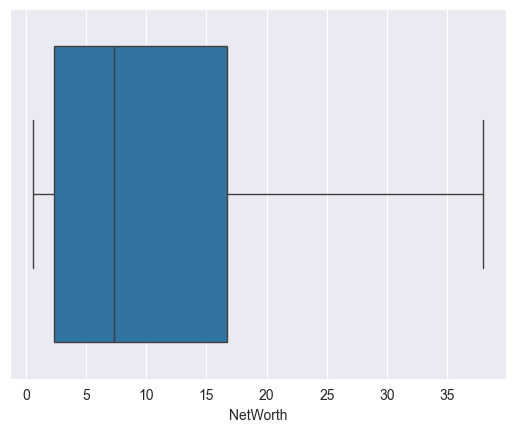

In [631]:
# Boxplot for the net worth of the billionaires
# Showfliers removes the outliers, I looked up how to do this
sns.boxplot(data=df, x="NetWorth", showfliers=False)

# Finding the data for the person with the highest and lowest net worth
df.loc[df["NetWorth"] == df["NetWorth"].max()]
df.loc[df["NetWorth"] == df["NetWorth"].min()]

# Range of the net worths
df["NetWorth"].max() - df["NetWorth"].min()

- more spread out = less
- more billionaires between 0-10ish

This boxplot shows that there are more billionaires with a net worth below 7 billion than after it.

,Population_2024,LandArea,Country,Region,UnMember,Population_GrowthRate,Population_Density,Name,NetWorth,PerMillionPeople,TotalWorth
66,1319041,45227.0,Estonia,Europe,True,-0.00282,79.9138,Kristo Käärmann,1.3,0.751,1.3
69,713082,32.9,Macau,Asia,False,0.01269,56136.2426,Hoi Kin Hong,1.3,1.464,1.3
74,47847,261.0,Saint Kitts and Nevis,North America,True,0.00193,476.6297,Myron Wentz,1.3,37.037,1.3


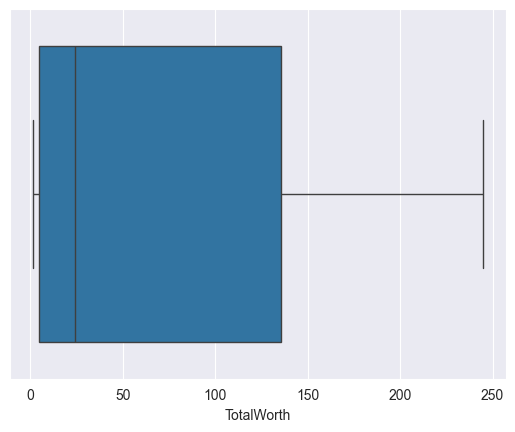

In [632]:
# Boxplot for the total worth of the billionaires
sns.boxplot(data=df, x="TotalWorth", showfliers=False)

# Finding the data for the person with the highest and lowest total worth
df.loc[df["TotalWorth"] == df["TotalWorth"].max()]
df.loc[df["TotalWorth"] == df["TotalWorth"].min()]

This plot shows that most people have a total worth between 0-25, while less people have a total worth above 25.

Because multiple people have the same minimum worth, I will check to see how many people have the same TotalWorth values.

In [633]:
# Sorts by the values that are most common
df['TotalWorth'].value_counts(ascending=False)


TotalWorth
1.3      3
2.3      2
4.3      2
669.2    1
4.7      1
        ..
11.6     1
5.5      1
54.7     1
1.8      1
12.4     1
Name: count, Length: 68, dtype: int64

#### 5.2 Catergorical Data

In [634]:
# Checking how many of each country there are to see if the information can be useful to me
df['Country'].value_counts()

Country
India          1
Austria        1
Finland        1
Slovakia       1
Denmark        1
              ..
Argentina      1
Algeria        1
Spain          1
South Korea    1
Monaco         1
Name: count, Length: 77, dtype: int64

In [635]:
# Checking how many of each region there are to see if the information can be useful to me
df['Region'].value_counts()

Region
Europe           30
Asia             24
Africa            8
North America     7
South America     6
Oceania           2
Name: count, dtype: int64

<Axes: title={'center': 'Amount of Billionaires by Region'}, xlabel='Region', ylabel='Count'>

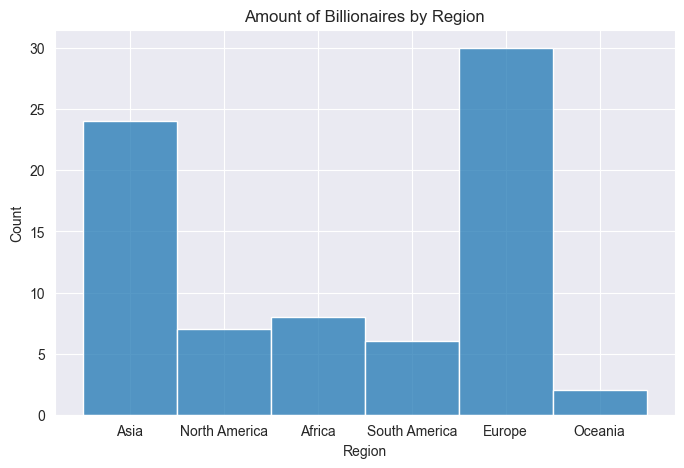

In [636]:
# Finding the region with the most rich people 
plt.figure(figsize=(8,5))
plt.title("Amount of Billionaires by Region")
sns.histplot(data=df, x="Region", binwidth=20)

This graph shows the amount of billionaires that live in each region. It shows that most of the billionaires live in Europe and Asia, and the least amount of billionaires live in Oceania. However, it should be noted that there are most likely less people living in Oceania than Europe.

In [637]:
# Seeing how many people are vs. are not a member of the UN
df['UnMember'].value_counts()

UnMember
True     73
False     4
Name: count, dtype: int64

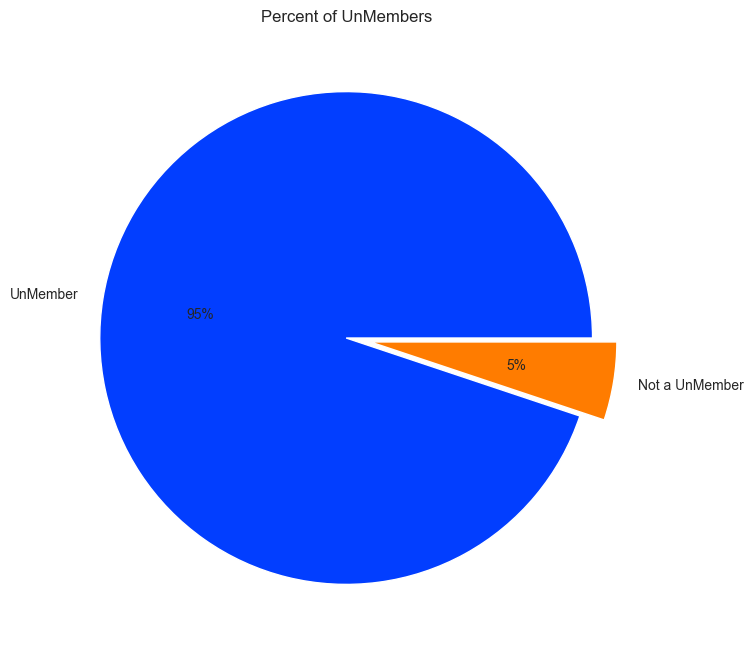

In [638]:
# I learned how to make a pie chart from Geeks for Geeks (https://www.geeksforgeeks.org/how-to-create-a-pie-chart-in-seaborn/) and the code
# is the same, I just added in my own data.

# Makes a pie chart of the percent of people that are vs. are not UnMembers
# Catergorical because it is True/False data
plt.figure(figsize=(50,8))
plt.title("Percent of UnMembers")

# These data numbers are taken from the value_counts of UnMembers shown above
data = [74,4]
keys = ['UnMember', 'Not a UnMember']
explode = [0, 0.1] 
palette_color = sns.color_palette('bright')
plt.pie(data,labels=keys, colors=palette_color, explode=explode, autopct='%.0f%%')
plt.show()

This pie chart shows that the majority of people are a member of the UN, but it should be considered that this seems like a lot, but I do not have that much data.

## 6. Multivariate Analysis

<Axes: title={'center': 'Net Worth vs. Population Density'}, xlabel='Population_Density', ylabel='NetWorth'>

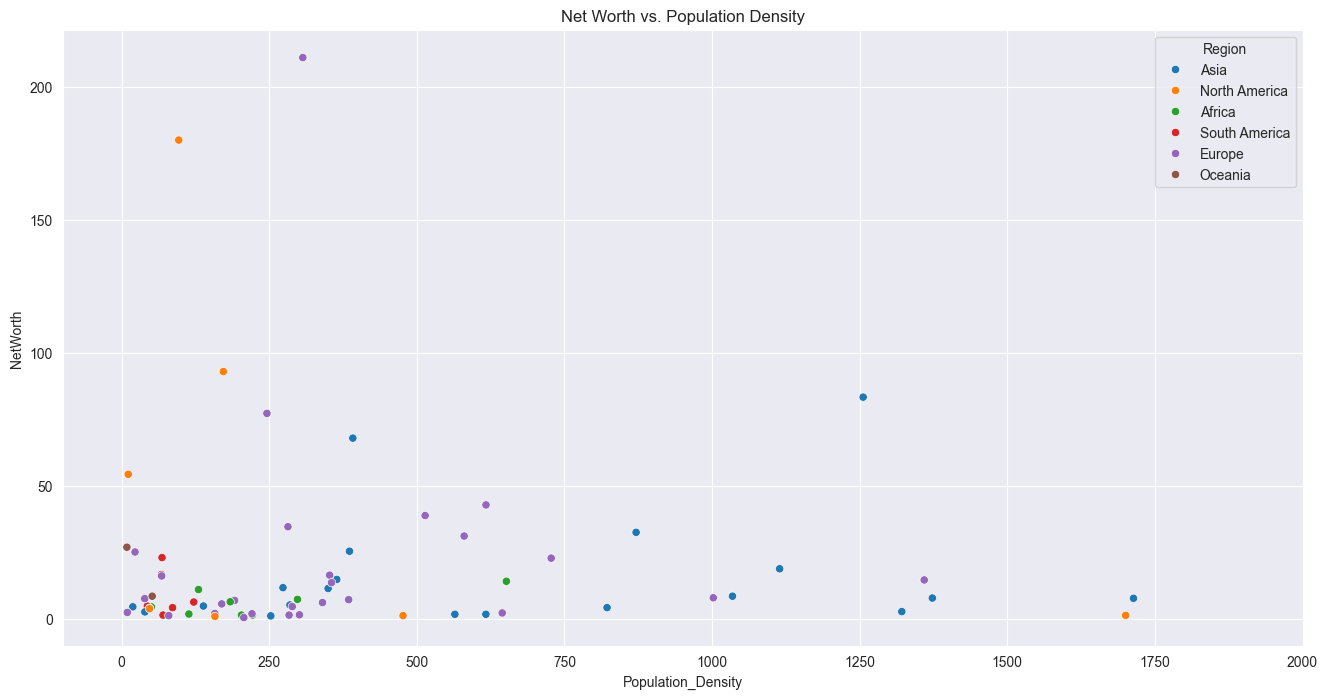

In [639]:
# Graph of the population density vs. net worth
plt.figure(figsize=(16,8))
plt.title("Net Worth vs. Population Density")
plt.xlim(-100,2000)
sns.scatterplot(data=df, x="Population_Density", y="NetWorth", hue="Region")

This graph shows that some of the data is arbitrary and that population density doesn't directly correlate to net worth. While there is a lot of data clustured around the lower population densities, because there are a lot of other points around it, there is no definite conclusion that can be made from this graph. Regardless, it is good to know that net worth isn't directly correlated with population density. Additionally, I included the regions in order to see if one country was more densely populated and how that would effect the context of the data.

In [640]:
# Checking to see the population densities of each region to see if it can help support the graph above.
df.groupby('Region')[['Population_Density']].mean()

,Population_Density
Region,
Africa,231.603513
Asia,4713.575292
Europe,1974.857797
North America,380.417271
Oceania,30.413450
South America,76.364517


<Axes: title={'center': 'Top 10 Richest Billionaires'}, xlabel='Name', ylabel='NetWorth'>

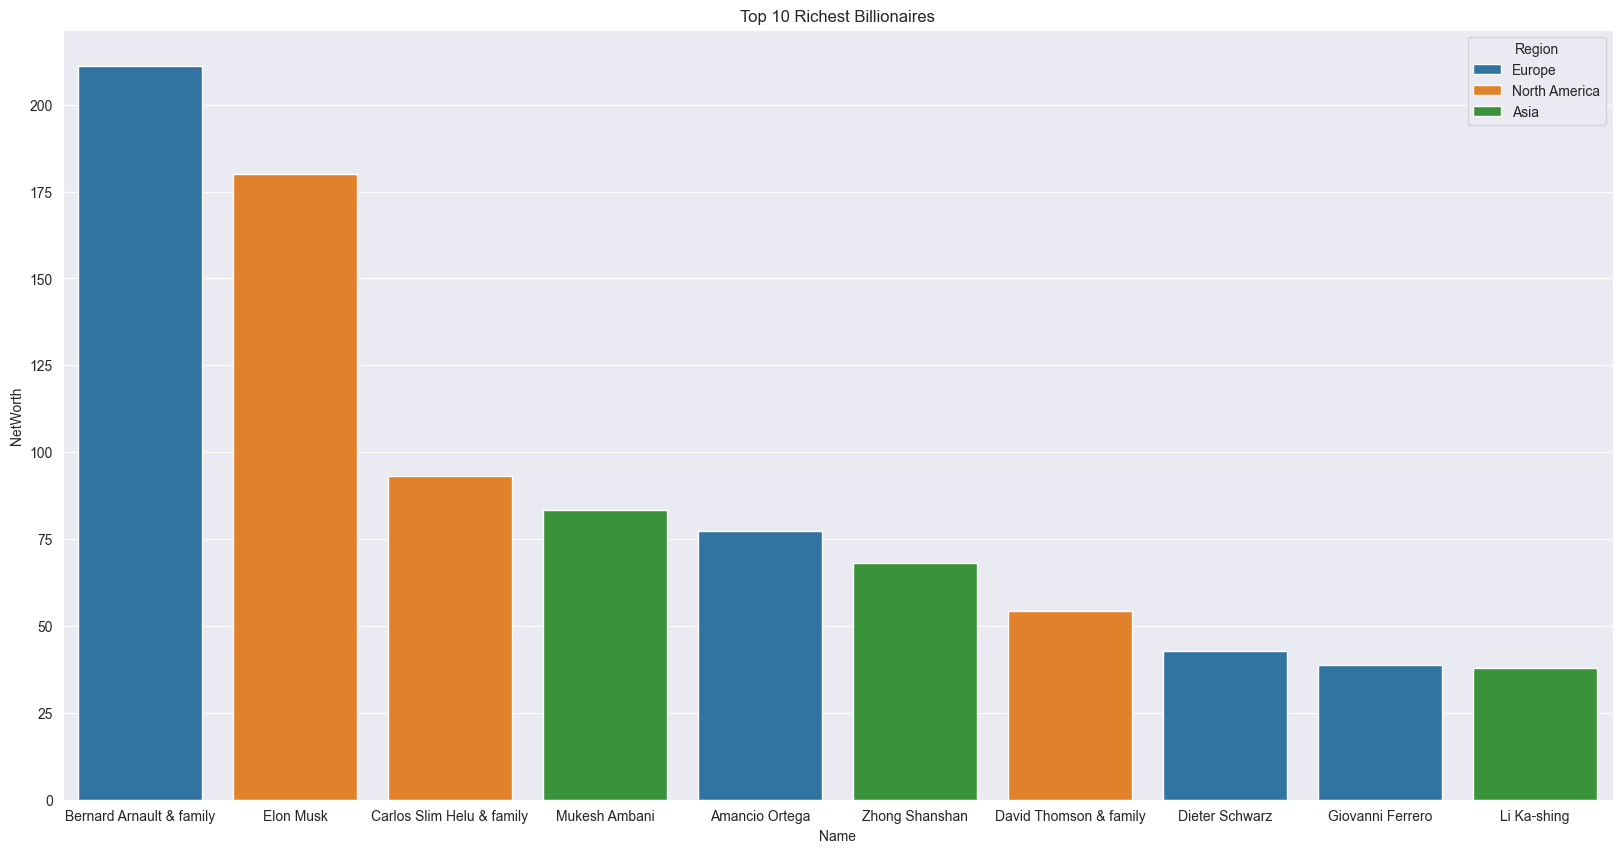

In [641]:
# Checking to see the top 10 richest billionaire and the region they live in 
#Sorting the data by having the richest first just to see who is richest
df.sort_values("NetWorth", ascending = False)

# Finding the 10 largest net worths and graphing them, showing the name, net worth, and region
# I learned how to do nlargest by looking it up
large_networth = df.nlargest(10, 'NetWorth')
plt.figure(figsize=(20,10))
plt.title("Top 10 Richest Billionaires")
sns.barplot(data=large_networth, x="Name", y="NetWorth", hue="Region")

This graph shows the top 10 richest billionaires and the amount of their net worth as well as the region they live in. It shows how in the top 10, most of the people are from Europe, but this cannot be generalized for the whole data because the other regions have around the same number. It also shows how the Bernard Arnault and Family has a much higher net worth than other people.

Questions:
1. Which region has the most billionaires?
2. Which region has the most UN members and how does that compare with the billionaires
3. What percent of the richest billionaires money is it out of the total
4. Net worth range


#### 1. Which region has the most UN members and how does that compare with the region with the most billionaires?

In [642]:
df.groupby('Region')[['UnMember']].sum()

,UnMember
Region,
Africa,8
Asia,21
Europe,29
North America,7
Oceania,2
South America,6


In [643]:
df['Region'].value_counts()

Region
Europe           30
Asia             24
Africa            8
North America     7
South America     6
Oceania           2
Name: count, dtype: int64

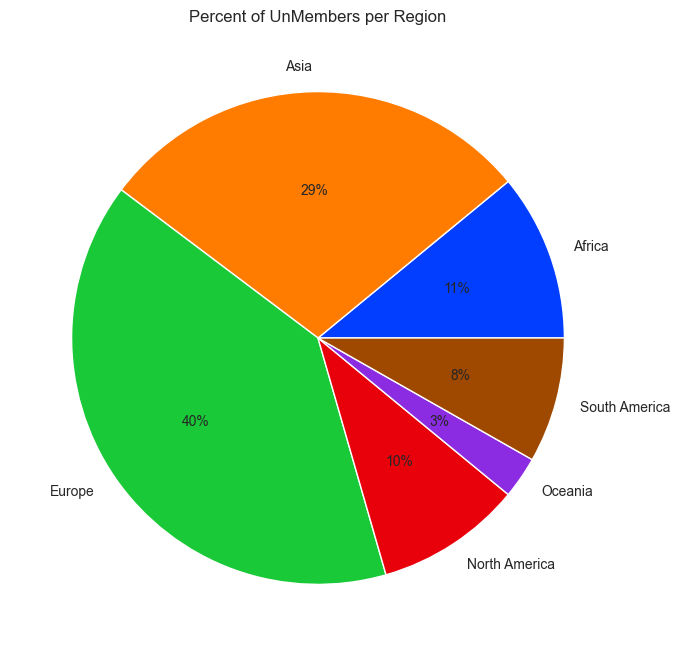

In [644]:
plt.figure(figsize=(50,8))
plt.title("Percent of UnMembers per Region")

# These data numbers are taken from the value_counts of UnMembers shown above
data = [8,21,29,7,2,6]
keys = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
palette_color = sns.color_palette('bright')
plt.pie(data,labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

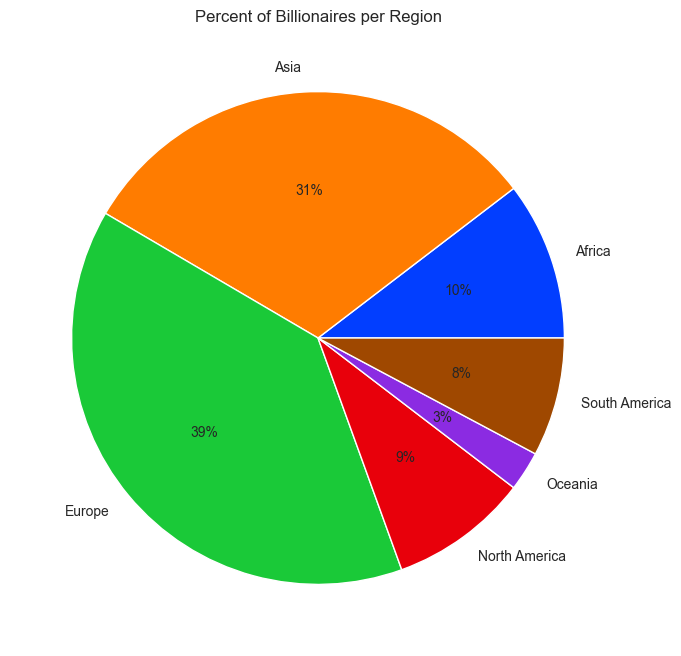

In [645]:
plt.figure(figsize=(50,8))
plt.title("Percent of Billionaires per Region")

# These data numbers are taken from the value_counts of UnMembers shown above
data = [8, 24, 30, 7, 2, 6]
keys = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
palette_color = sns.color_palette('bright')
plt.pie(data,labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

These pie charts show that the percent of billionaires is almost the same as the percent of unmumbers. However, almost all of the people are UN members, so this makes sense for it to be this way. Regardless, the richest billionaires have the most people in the UN. 

### 2. How does country size relate to the amount of billionaires?

In [646]:
g = df.groupby('Region')[['LandArea']].mean()

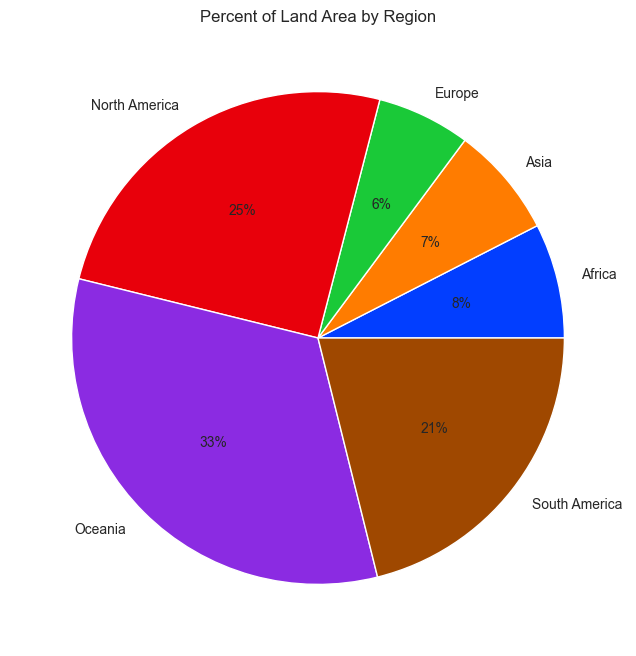

In [647]:
plt.figure(figsize=(50,8))
plt.title("Percent of Land Area by Region")

# These data numbers are taken from the value_counts of UnMembers shown above
data = [9.160942e+05,8.863063e+05,7.449626e+05,3.060104e+06,3.981246e+06,2.565946e+06]
keys = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
palette_color = sns.color_palette('bright')
plt.pie(data,labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

In [648]:
df['Region'].value_counts()

Region
Europe           30
Asia             24
Africa            8
North America     7
South America     6
Oceania           2
Name: count, dtype: int64

<Axes: xlabel='Region', ylabel='LandArea'>

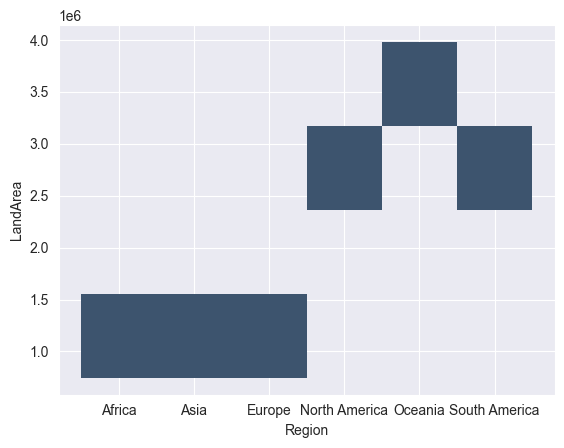

In [649]:
#HOW TO GET NUMBER OF BILLIONAIRES PER LAND AREA
sns.histplot(data=g, x="Region", y="LandArea")

<Axes: xlabel='Region', ylabel='UnMember'>

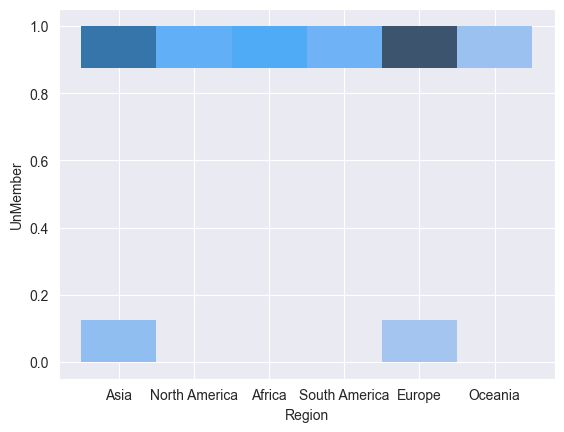

In [650]:
sns.histplot(data=df, x="Region", y="UnMember")

### 3. What percent of money does the top billionaire make in comparison to the other billionaires?

In [651]:
df['TotalWorth'].max()

df['TotalWorth'].sum()

df['TotalWorth'].max()/df['TotalWorth'].sum() *100

36.88511798671059

In [652]:
df['TotalWorth'].sum()

12175.099999999997

In [653]:
df['Country'].value_counts(ascending=False)

Country
India          1
Austria        1
Finland        1
Slovakia       1
Denmark        1
              ..
Argentina      1
Algeria        1
Spain          1
South Korea    1
Monaco         1
Name: count, Length: 77, dtype: int64

## 7. Statistical Analysis

#### 1. How many billionaires are in each country?/Which country has the most billionaires?

In [654]:
# The value of the below line originally gave an eroor because one of the values was 'TRUE,' therefore I looked at the unique values.
#(df['PerMillionPeople']/1000000)
df['Population_2024'].unique()

array(['1441719852', '1425178782', '341814420', '279798049', '229152217',
       '217637297', '174701211', '143957079', '129388467', '122631432',
       '119106224', '114484252', '99497680', '86260417', '83252474',
       '71885799', '69419073', '67961439', '64881830', '61020221',
       '58697744', '52340774', '51741963', '47473373', '46278751',
       '46057866', '40221726', '39107046', '38211459', '37937821',
       '34683444', '34671895', '31240315', '29395334', '26699482',
       '23950214', '19828165', '19658839', '19618996', '17671125',
       '17020321', '11715774', '10673669', '10503734', '10302720',
       '10223349', '9994993', '9591853', '9311652', '8977139', '8851431',
       '7496681', '6618615', '6052709', '5939695', '5702832', '5549886',
       '5514477', '5269939', '5219044', '5089478', '4713553', '4527961',
       '3717425', '2777979', '2737061', '1319041', '1268467', '1222075',
       '713082', '416656', '377689', '282309', '63788', '47847', '39822',
       '36157', 

Because one of the values for Population is TRUE, I won't be able to do math on it, so I will change the value to 0.

In [655]:
# Method replaced any value with 'TRUE' with 0.
def replace_for_none(word):
    if word in ['TRUE']:
        return 0
    return word

df['Population_2024'] = df['Population_2024'].map(replace_for_none)

# Checking if the value is still there.
df['Population_2024'].unique()

array(['1441719852', '1425178782', '341814420', '279798049', '229152217',
       '217637297', '174701211', '143957079', '129388467', '122631432',
       '119106224', '114484252', '99497680', '86260417', '83252474',
       '71885799', '69419073', '67961439', '64881830', '61020221',
       '58697744', '52340774', '51741963', '47473373', '46278751',
       '46057866', '40221726', '39107046', '38211459', '37937821',
       '34683444', '34671895', '31240315', '29395334', '26699482',
       '23950214', '19828165', '19658839', '19618996', '17671125',
       '17020321', '11715774', '10673669', '10503734', '10302720',
       '10223349', '9994993', '9591853', '9311652', '8977139', '8851431',
       '7496681', '6618615', '6052709', '5939695', '5702832', '5549886',
       '5514477', '5269939', '5219044', '5089478', '4713553', '4527961',
       '3717425', '2777979', '2737061', '1319041', '1268467', '1222075',
       '713082', '416656', '377689', '282309', '63788', '47847', '39822',
       '36157', 

In [656]:
# Gets the number of billionaires per country, but right now it is sorted by index.
# Calculation = population size * billionaires per million of people
(df['Population_2024'].sort_index(ascending=True).astype(float)/1000000) * df['PerMillionPeople'].astype(float)

# Adding this as a new column
df["Billionaires_inCountry"] = (df['Population_2024'].sort_index(ascending=True).astype(float)/1000000) * df['PerMillionPeople'].astype(float)
df.head(10)

,Population_2024,LandArea,Country,Region,UnMember,Population_GrowthRate,Population_Density,Name,NetWorth,PerMillionPeople,TotalWorth,Billionaires_inCountry
0,1441719852,3287590.0,India,Asia,True,0.00916,1255.9084,Mukesh Ambani,83.4,0.103,669.2,148.497145
1,1425178782,9706961.0,China,Asia,True,-0.00035,391.6530,Zhong Shanshan,68.0,0.253,1644.7,360.570232
2,341814420,9372610.0,United States,North America,True,0.00535,96.7813,Elon Musk,180.0,1.853,4490.8,633.382120
3,279798049,1904569.0,Indonesia,Asia,True,0.00816,385.9758,Low Tuck Kwong,25.5,0.056,138.4,15.668691
4,229152217,923768.0,Nigeria,Africa,True,0.02389,651.6511,Aliko Dangote,14.2,0.014,28.5,3.208131
5,217637297,8515767.0,Brazil,South America,True,0.00561,67.4409,Vicky Safra & family,16.7,0.211,160.4,45.921470
6,174701211,147570.0,Bangladesh,Asia,True,0.01010,3476.0401,Muhammed Aziz Khan,1.0,1.000,NaN,174.701211
7,143957079,17098242.0,Russia,Europe,True,-0.00337,22.7668,Andrey Melnichenko & family,25.2,0.856,471.3,123.227260
8,129388467,1964375.0,Mexico,North America,True,0.00726,172.3893,Carlos Slim Helu & family,93.0,0.095,168.9,12.291904
9,122631432,377930.0,Japan,Asia,True,-0.00538,871.3729,Tadashi Yanai & family,32.6,0.207,151.1,25.384706


In [657]:
# Seeing the data in a different form and viewing it with country.
df.groupby('Country')[['Billionaires_inCountry']].sum().round()

,Billionaires_inCountry
Country,
Algeria,1.0
Argentina,5.0
Armenia,3.0
Australia,33.0
Austria,9.0
...,...
United Kingdom,49.0
United States,633.0
Venezuela,1.0


In [658]:
# Finding the top 10 values for Billionaires_inCountry
large_inCountry = df.nlargest(10, 'Billionaires_inCountry')

<Axes: title={'center': 'Top 10 Countries with the Largest Amount of Billionaires'}, xlabel='Country', ylabel='Billionaires_inCountry'>

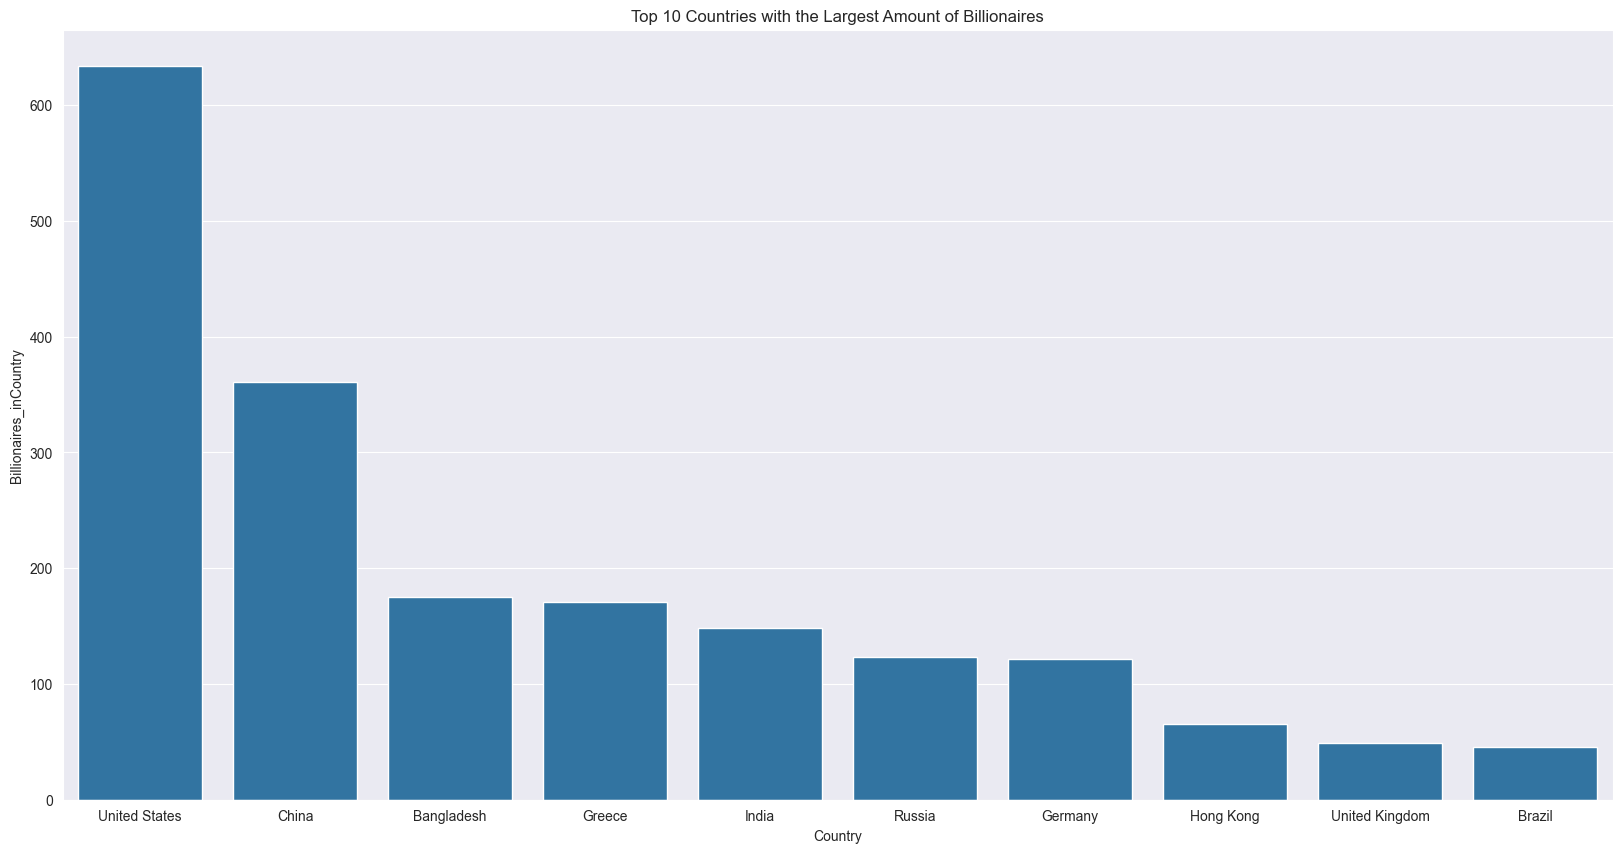

In [659]:
# Finding the country with the most billionaires and getting the top ten countries
plt.figure(figsize=(20,10))
plt.title("Top 10 Countries with the Largest Amount of Billionaires")
sns.barplot(data=large_inCountry, x="Country", y="Billionaires_inCountry")

This graph shows the countries with the most billionaires. It shows that the US has the most billionaires while places like Brazil have the least amount of billionaires out of the top 10 countries with the most billionaires.

In [660]:
# Seeing how the population size relates to the country to see if it can help me interpret the data above.
df.groupby('Country')[['Population_2024']].sum()

,Population_2024
Country,
Algeria,46278751
Argentina,46057866
Armenia,2777979
Australia,26699482
Austria,8977139
...,...
United Kingdom,67961439
United States,341814420
Venezuela,29395334


#### 2. What is the average net worth per billionaire in their specified country?

In [661]:
# Total net worth = all of the billionaires in that country's net worth added up
# Calculation = Total worth * 100000000 (in order to get it into billiones instead of the format right now)/
# the number of billionaires in the country
(df["TotalWorth"].astype(float) * 1000000000) / df['Billionaires_inCountry'].astype(float)

0     4.506484e+09
1     4.561386e+09
2     7.090191e+09
3     8.832901e+09
4     8.883677e+09
          ...     
73    2.277184e+09
74    7.335890e+08
75    2.246481e+09
76    4.355459e+09
77             NaN
Length: 78, dtype: float64

Because this is information I can use again, I am going to make a new column for it.

In [662]:
# Making a new column for the new information
df["Country_AvgNetWorth_PerBillionaire"] = (df["TotalWorth"].astype(float) * 1000000000) / df['Billionaires_inCountry']
df.head(10)

,Population_2024,LandArea,Country,Region,UnMember,Population_GrowthRate,Population_Density,Name,NetWorth,PerMillionPeople,TotalWorth,Billionaires_inCountry,Country_AvgNetWorth_PerBillionaire
0,1441719852,3287590.0,India,Asia,True,0.00916,1255.9084,Mukesh Ambani,83.4,0.103,669.2,148.497145,4.506484e+09
1,1425178782,9706961.0,China,Asia,True,-0.00035,391.6530,Zhong Shanshan,68.0,0.253,1644.7,360.570232,4.561386e+09
2,341814420,9372610.0,United States,North America,True,0.00535,96.7813,Elon Musk,180.0,1.853,4490.8,633.382120,7.090191e+09
3,279798049,1904569.0,Indonesia,Asia,True,0.00816,385.9758,Low Tuck Kwong,25.5,0.056,138.4,15.668691,8.832901e+09
4,229152217,923768.0,Nigeria,Africa,True,0.02389,651.6511,Aliko Dangote,14.2,0.014,28.5,3.208131,8.883677e+09
5,217637297,8515767.0,Brazil,South America,True,0.00561,67.4409,Vicky Safra & family,16.7,0.211,160.4,45.921470,3.492920e+09
6,174701211,147570.0,Bangladesh,Asia,True,0.01010,3476.0401,Muhammed Aziz Khan,1.0,1.000,NaN,174.701211,NaN
7,143957079,17098242.0,Russia,Europe,True,-0.00337,22.7668,Andrey Melnichenko & family,25.2,0.856,471.3,123.227260,3.824641e+09
8,129388467,1964375.0,Mexico,North America,True,0.00726,172.3893,Carlos Slim Helu & family,93.0,0.095,168.9,12.291904,1.374075e+10
9,122631432,377930.0,Japan,Asia,True,-0.00538,871.3729,Tadashi Yanai & family,32.6,0.207,151.1,25.384706,5.952403e+09


In [663]:
# Getting the top ten largest average net worth's per billionaire per country
large_AvgNetWorth = df.nlargest(10, 'Country_AvgNetWorth_PerBillionaire')

<Axes: title={'center': 'Top 10 Countries with the Largest Average Net Worth Per Billionaires'}, xlabel='Country', ylabel='Country_AvgNetWorth_PerBillionaire'>

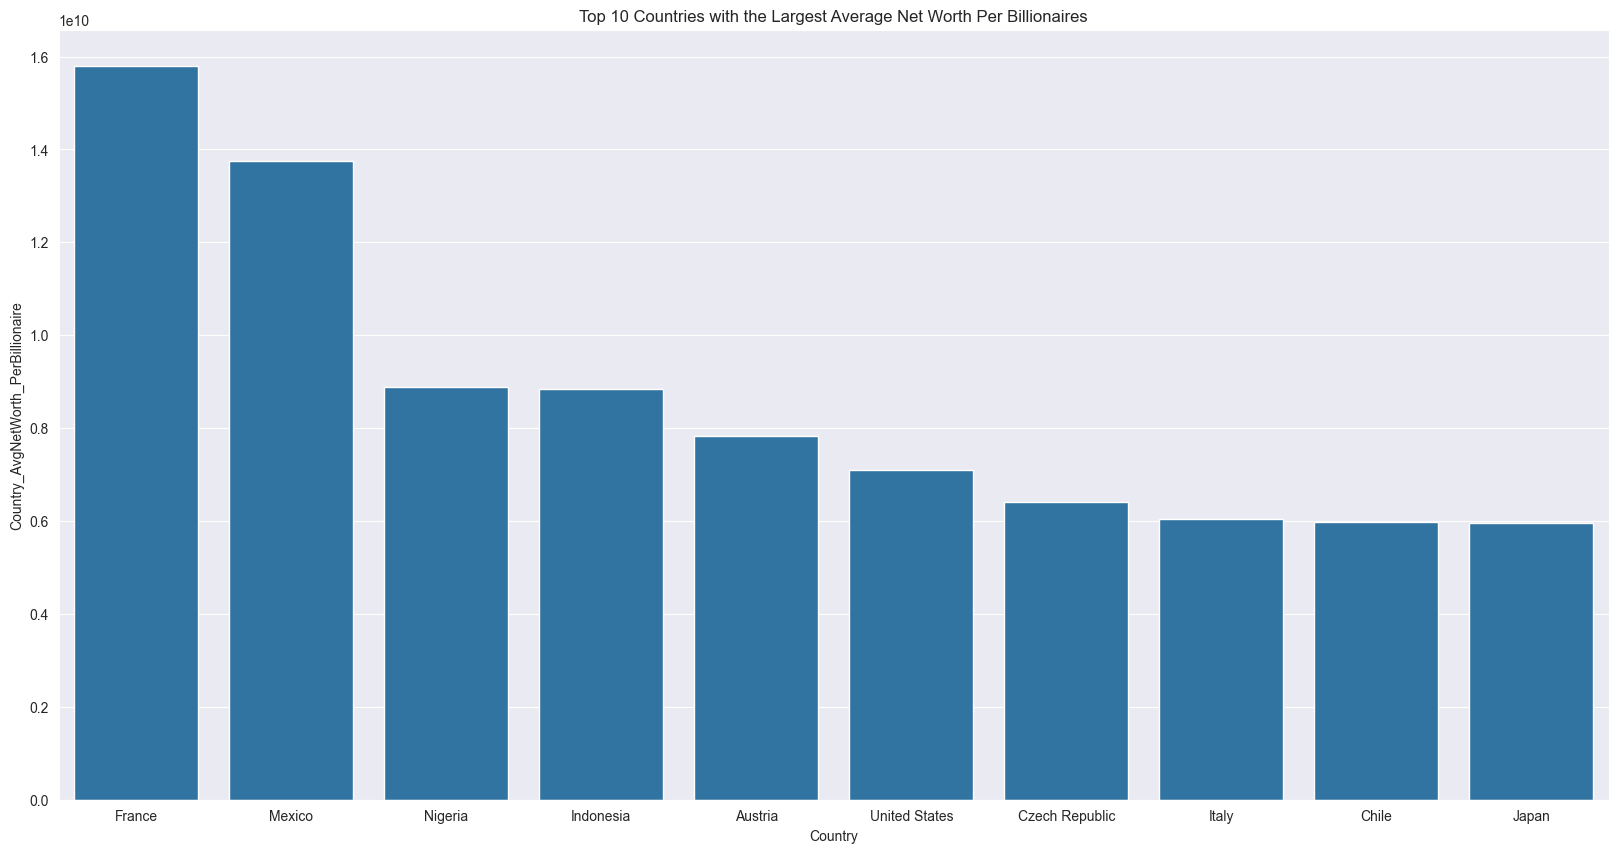

In [664]:
# Graphing the country and their average net worth per billionaire for the top 10 countries.
plt.figure(figsize=(20,10))
plt.title("Top 10 Countries with the Largest Average Net Worth Per Billionaires")
sns.barplot(data=large_AvgNetWorth, x="Country", y ="Country_AvgNetWorth_PerBillionaire")

This graph shows that France has the largest average net worth per billionaire while countries like Italy, Chile, and Japan have around the same average net worths per billionaire.

#### 3. How much percent of the total billionaire worth do the richest billionaires make up?

In [665]:
# Finding the percent of money that each billionaire makes compared to the whole
# Calculation: net worth of person / net worth of all the billionaires in that country * 100 to make it a percent
df["NetWorth"]/df["TotalWorth"] * 100.0

0      12.462642
1       4.134493
2       4.008195
3      18.424855
4      49.824561
         ...    
73    100.000000
74    100.000000
75    100.000000
76     66.935484
77           NaN
Length: 78, dtype: float64

In [666]:
# Adding a column for the new information
df["Percent_ofTotal"] = df["NetWorth"]/df["TotalWorth"] * 100.0
df.head(10)

,Population_2024,LandArea,Country,Region,UnMember,Population_GrowthRate,Population_Density,Name,NetWorth,PerMillionPeople,TotalWorth,Billionaires_inCountry,Country_AvgNetWorth_PerBillionaire,Percent_ofTotal
0,1441719852,3287590.0,India,Asia,True,0.00916,1255.9084,Mukesh Ambani,83.4,0.103,669.2,148.497145,4.506484e+09,12.462642
1,1425178782,9706961.0,China,Asia,True,-0.00035,391.6530,Zhong Shanshan,68.0,0.253,1644.7,360.570232,4.561386e+09,4.134493
2,341814420,9372610.0,United States,North America,True,0.00535,96.7813,Elon Musk,180.0,1.853,4490.8,633.382120,7.090191e+09,4.008195
3,279798049,1904569.0,Indonesia,Asia,True,0.00816,385.9758,Low Tuck Kwong,25.5,0.056,138.4,15.668691,8.832901e+09,18.424855
4,229152217,923768.0,Nigeria,Africa,True,0.02389,651.6511,Aliko Dangote,14.2,0.014,28.5,3.208131,8.883677e+09,49.824561
5,217637297,8515767.0,Brazil,South America,True,0.00561,67.4409,Vicky Safra & family,16.7,0.211,160.4,45.921470,3.492920e+09,10.411471
6,174701211,147570.0,Bangladesh,Asia,True,0.01010,3476.0401,Muhammed Aziz Khan,1.0,1.000,NaN,174.701211,NaN,NaN
7,143957079,17098242.0,Russia,Europe,True,-0.00337,22.7668,Andrey Melnichenko & family,25.2,0.856,471.3,123.227260,3.824641e+09,5.346913
8,129388467,1964375.0,Mexico,North America,True,0.00726,172.3893,Carlos Slim Helu & family,93.0,0.095,168.9,12.291904,1.374075e+10,55.062167
9,122631432,377930.0,Japan,Asia,True,-0.00538,871.3729,Tadashi Yanai & family,32.6,0.207,151.1,25.384706,5.952403e+09,21.575116


In [667]:
# Getting the 10 largest and seein all of the values and their commonalities
df.nlargest(10, 'Percent_ofTotal')
df['Percent_ofTotal'].value_counts()

Percent_ofTotal
100.000000    14
14.713896      1
20.353982      1
55.131265      1
22.727273      1
36.206897      1
50.632911      1
11.538462      1
26.872964      1
38.461538      1
53.738318      1
16.681377      1
49.080622      1
15.123606      1
10.345766      1
12.462642      1
50.000000      1
13.060897      1
17.298578      1
51.612903      1
29.285714      1
21.212121      1
67.716535      1
23.728814      1
19.337017      1
62.790698      1
56.976744      1
60.000000      1
37.228261      1
5.731080       1
21.572212      1
4.134493       1
27.272727      1
4.008195       1
18.424855      1
49.824561      1
10.411471      1
5.346913       1
55.062167      1
21.575116      1
20.772947      1
38.743455      1
34.126984      1
9.169550       1
7.358491       1
14.781746      1
11.336634      1
35.762712      1
43.359375      1
18.042672      1
35.359116      1
10.618280      1
57.174556      1
38.281250      1
28.703704      1
22.195022      1
53.571429      1
49.137931      

<Axes: title={'center': 'Percent of Total Billionaire Worth'}, xlabel='Percent_ofTotal'>

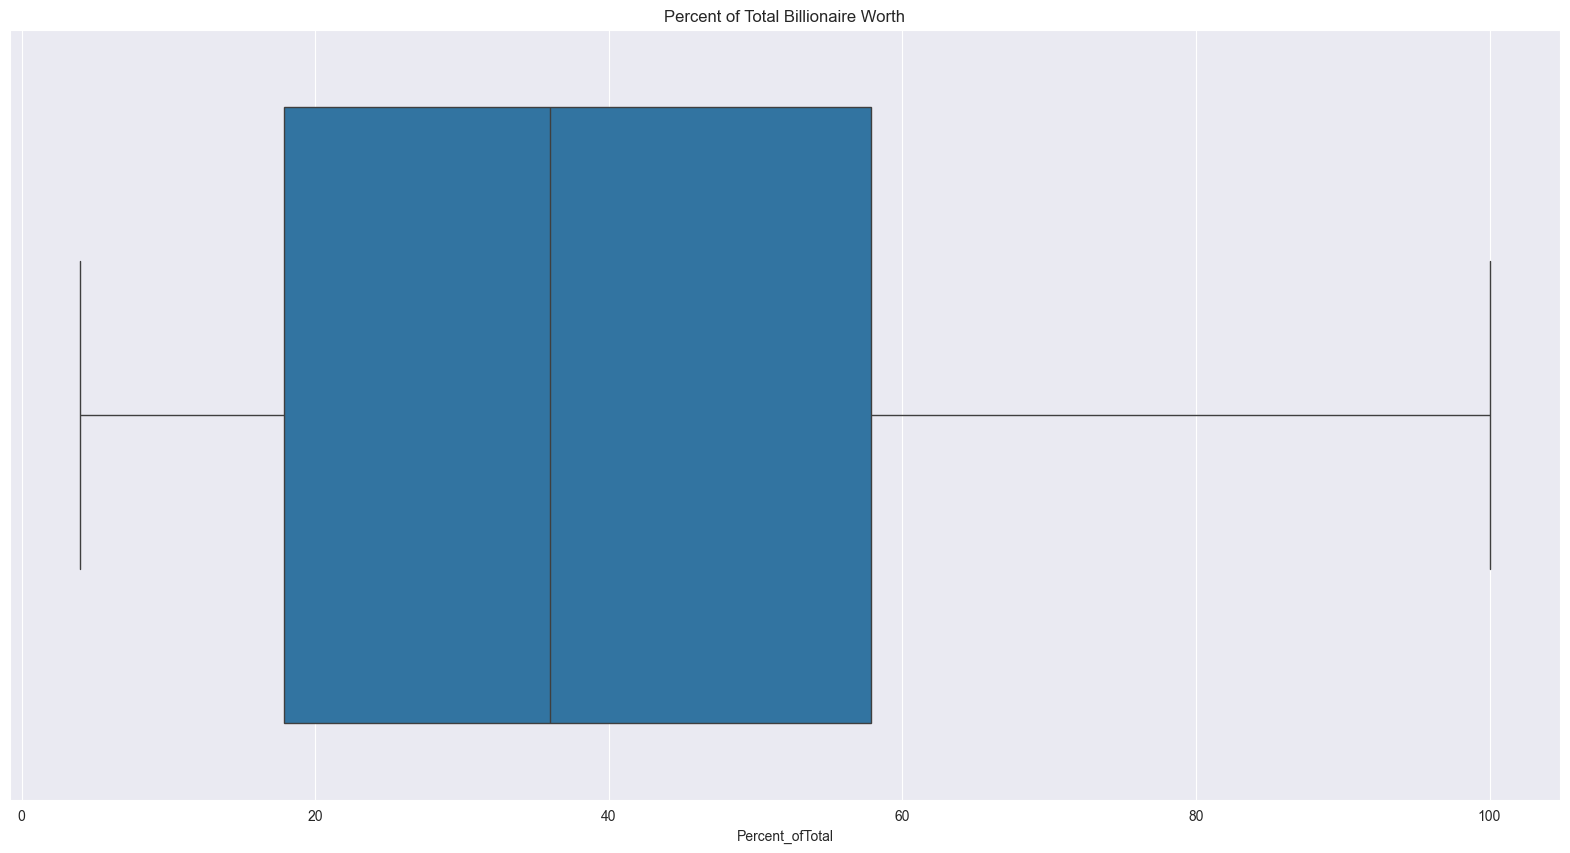

In [668]:
# Graphing the information previously found
plt.figure(figsize=(20,10))
plt.title("Percent of Total Billionaire Worth")
sns.boxplot(data=df, x="Percent_ofTotal")

This graph means that there are more people that make up between around 5-35 percent of the total net worth of all the billionaire in their country than people who make up more than that. The average is around 35 and there are not many people that make up more than 35% of their total countries net worth.